In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [119]:
trait_renaming = pd.read_csv(
    "../../results/gwas_gokcen/raw/disease_list.txt", delim_whitespace=True, header=None,
    names=["trait", "source", "name"]
).set_index("trait")["name"].to_dict()
trait_renaming

{'AD': 'alzheimers_disease',
 'ADHD': 'attention_deficit_hyperactivity_disorder',
 'AIT': 'autoimmune_disease',
 'ASM': 'asthma',
 'BMD-HT': 'bone_mineral_density',
 'BMI': 'body_mass_index',
 'BP': 'bipolar_disorder',
 'Breast_cancer': 'breast_cancer',
 'CAD': 'coronary_artery_disease',
 'CD': 'crohns_disease',
 'Celiac': 'celiac',
 'CVD': 'cardiovascular_disease',
 'ECOL': 'college_educatiojn',
 'Eczema': 'eczema',
 'EY': 'years_education',
 'FG': 'fasting_glucose',
 'Glucose': 'glucose',
 'HbA1c': 'hba1c',
 'HDL': 'hdl',
 'Height': 'height',
 'HT': 'hypothyroidism',
 'HTN': 'hypertension',
 'IBD': 'inflammatory_bowel_disease',
 'Insomnia': 'insomnia',
 'Intel': 'intelligence',
 'LDL': 'ldl',
 'MCH': 'mean_corpuscular_hemoglobin',
 'MDD': 'major_depressive_disorder',
 'MNP': 'morning_person',
 'MNR': 'age_of_menarche',
 'MS': 'multiple_sclerosis',
 'NRT': 'neuroticism',
 'PLT': 'platelet_count',
 'RA': 'rheumatoid_arthritis',
 'RBC': 'red_count',
 'RDW': 'red_blood_cell_width',
 'RR-

In [113]:
enformer_renaming = pd.read_csv("../../results/metadata/Enformer.csv").set_index("name").description.str[:30].to_dict()
borzoi_renaming = pd.read_csv("../../results/metadata/Borzoi.csv").set_index("name").description.str[:30].to_dict()

In [137]:
traits = [
    "IBD",
    "Height",
    "CD",
    "BMD-HT",
    "PLT",
    "TG",
    "BMI",
    "EY",
    "MNR",
    "Breast_cancer",
    "MNP",
]

models = [
    "Enformer_L2",
    "Borzoi_L2",
    "CADD",
    "GPN-MSA_InnerProducts",
]

dfs = []
n_hits = {}

for trait in traits:
    base_dir = f"../../results/dataset/gwas_gokcen_{trait}_cre_matched_9/"
    n_hits[trait] = len(pd.read_parquet(base_dir + "test.parquet")) // 10
    for model in models:
        df = pd.read_csv(base_dir + f"unsupervised_metrics/{model}.csv")
        if model == "Enformer_L2":
            df.feature = df.feature.map(enformer_renaming)
            df = df.drop_duplicates("feature")
        elif model == "Borzoi_L2":
            df.feature = df.feature.map(borzoi_renaming)
            df = df.drop_duplicates("feature")
        df = df.head(5)
        df["trait"] = trait
        df["model"] = model
        dfs.append(df)
df = pd.concat(dfs)
df

,AUPRC,feature,trait,model
0,0.156403,"CHIP:H3K27me3:CD8-positive, al",IBD,Enformer_L2
1,0.151142,CHIP:EZH2:PC-3,IBD,Enformer_L2
2,0.149873,"CHIP:H3K27me3:CD4-positive, al",IBD,Enformer_L2
5,0.145907,CHIP:H3K27me3:naive thymus-der,IBD,Enformer_L2
6,0.145546,CAGE:Peripheral Blood Mononucl,IBD,Enformer_L2
...,...,...,...,...
0,0.449250,embedding_518,MNP,GPN-MSA_InnerProducts
1,0.426414,embedding_35,MNP,GPN-MSA_InnerProducts
2,0.413407,embedding_714,MNP,GPN-MSA_InnerProducts
3,0.411522,embedding_348,MNP,GPN-MSA_InnerProducts


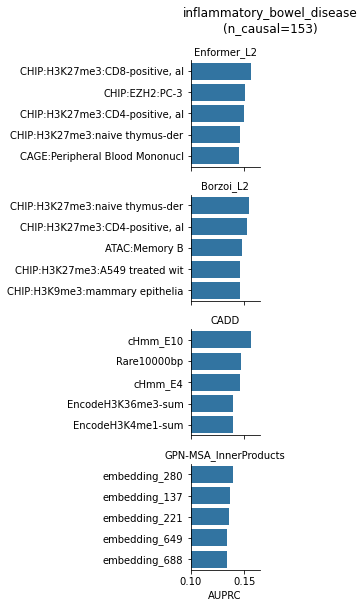

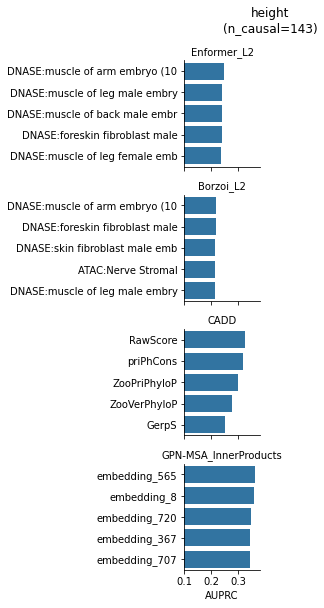

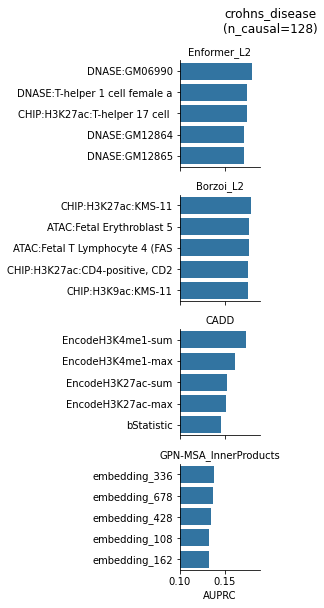

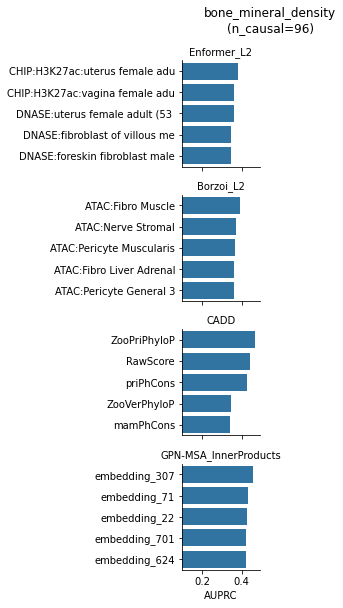

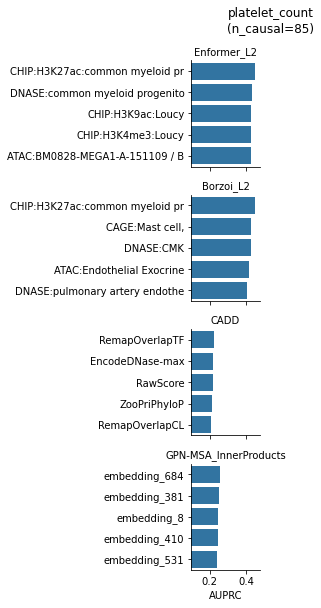

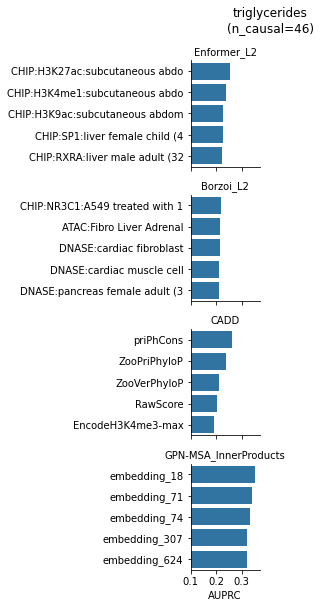

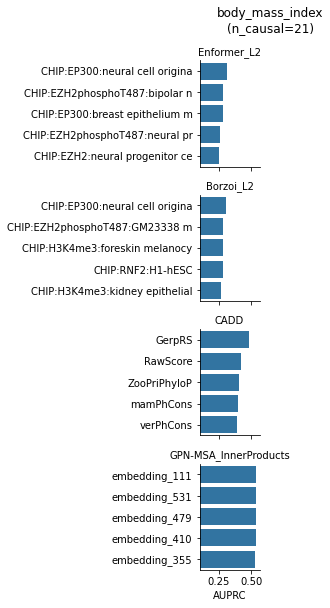

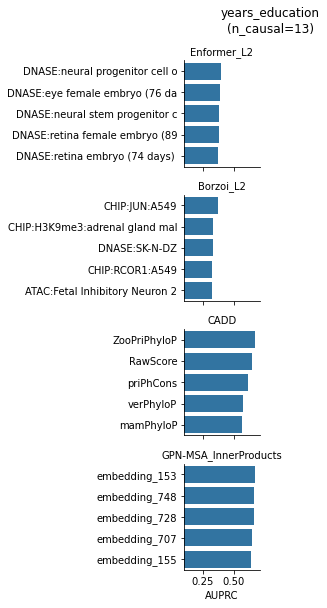

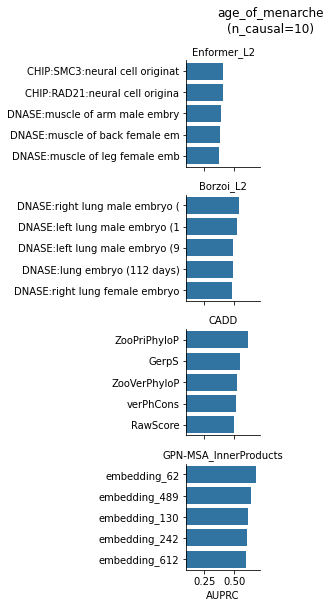

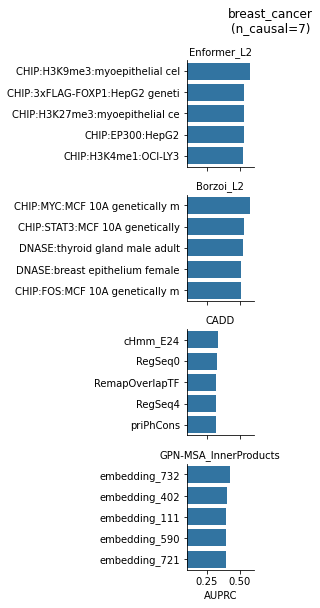

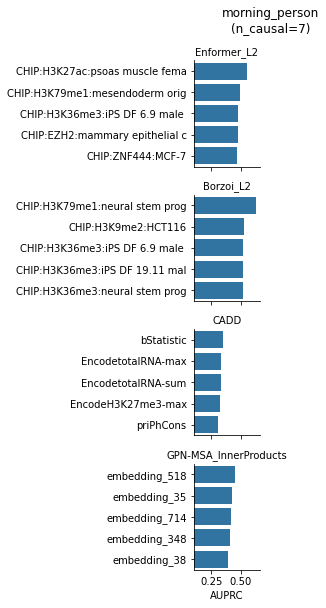

In [140]:
for trait in traits:
    g = sns.catplot(
        data=df[df.trait == trait],
        y="feature",
        x="AUPRC",
        row="model",
        sharex=True,
        sharey=False,
        kind="bar",
        #kind="point", join=False,
        color="C0",
        height=2,
        aspect=2,
        #height=2,
        #aspect=2,
    )
    g.set(
        xlim=0.1,
        ylabel="",
    )
    g.set_titles("{row_name}")
    plt.suptitle(
        trait_renaming[trait] + f"\n(n_causal={n_hits[trait]})",
        x=1.0,
        y=1.05,
    )
    #plt.savefig("top_features.pdf", bbox_inches="tight")
    plt.show()

/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

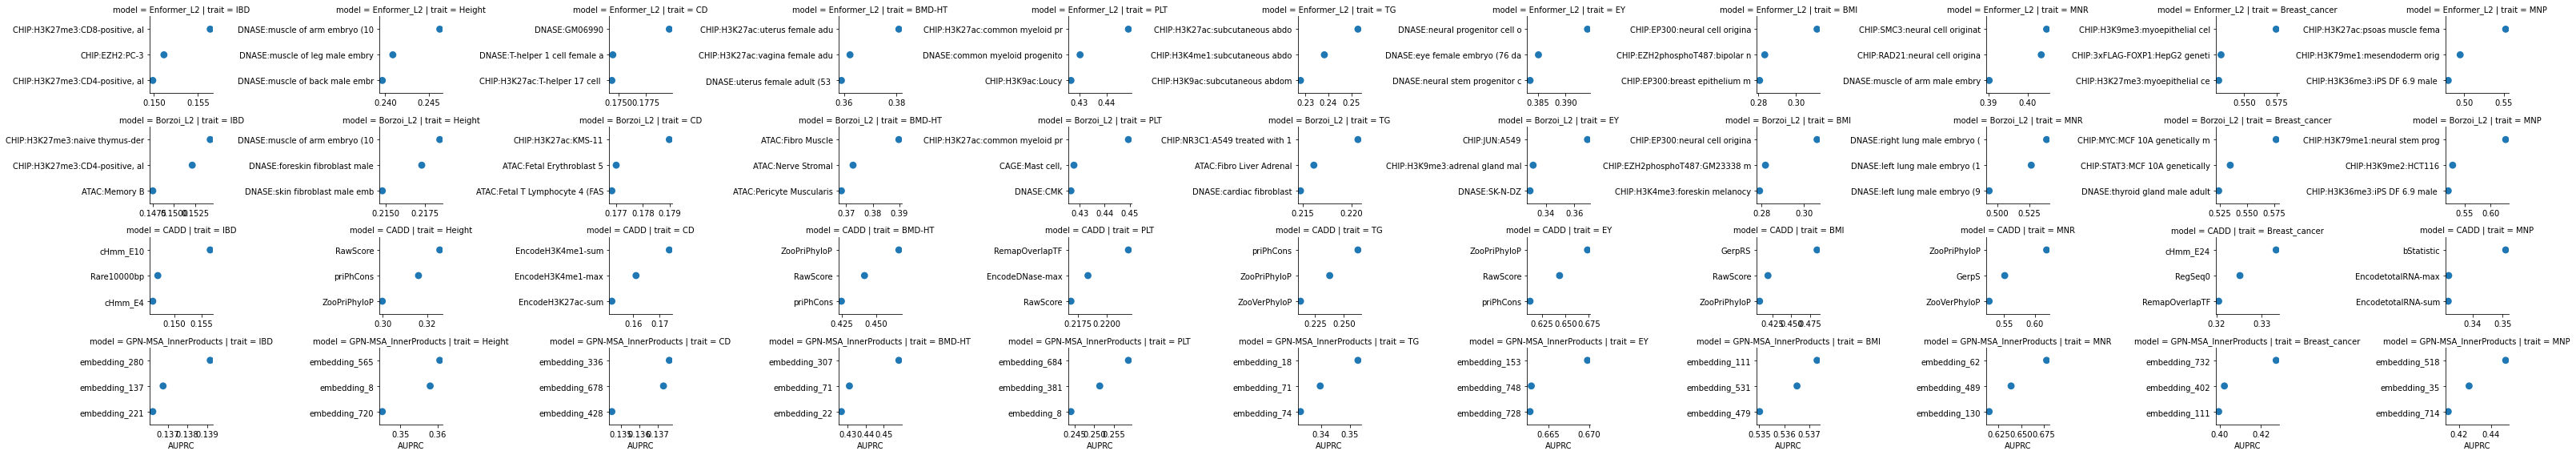

In [117]:
g = sns.catplot(
    data=df,
    y="feature",
    x="AUPRC",
    row="model",
    col="trait",
    #sharex=True,
    sharex=False,
    sharey=False,
    #kind="bar",
    kind="point", join=False,
    color="C0",
    height=2,
    aspect=2,
)
# increase space between columns:
#g.fig.subplots_adjust(wspace=2.0)
g.set(
    #xlim=0.5,
    ylabel=""
)
#plt.savefig("top_features.pdf", bbox_inches="tight")

In [146]:
NON_EXONIC = [
    "intergenic_variant",
    "intron_variant",
    "upstream_gene_variant",
    "downstream_gene_variant"
]

cre_classes = ["PLS", "pELS", "dELS", "DNase-H3K4me3", "CTCF-only"]


In [151]:
for trait in traits:
    base_dir = f"../../results/dataset/gwas_gokcen_{trait}_matched_9/"
    df = pd.read_parquet(base_dir + "test.parquet").query("label")
    print(trait)
    print(df.consequence.value_counts().head(10))
    print("\n")
    #df2 = df[~df.consequence.isin(NON_EXONIC + cre_classes)]
    #df3 = df[df.consequence=="missense_variant"]
    #print(trait, len(df), len(df2), len(df3))

IBD
consequence
intron_variant                        545
intergenic_variant                    267
dELS                                  117
non_coding_transcript_exon_variant     40
3_prime_UTR_variant                    27
pELS                                   21
downstream_gene_variant                16
synonymous_variant                     13
PLS                                    10
upstream_gene_variant                  10
Name: count, dtype: int64


Height
consequence
intron_variant                        196
missense_variant                      107
dELS                                   91
intergenic_variant                     77
3_prime_UTR_variant                    44
pELS                                   38
5_prime_UTR_variant                    29
non_coding_transcript_exon_variant     28
synonymous_variant                     19
PLS                                     9
Name: count, dtype: int64


CD
consequence
intron_variant                        425
intergenic_v

In [152]:
!ls ../../results/gwas_gokcen/raw/Height*


../../results/gwas_gokcen/raw/Height-UKB460k_Height.susie.gwfinemap.b38.gz


In [163]:
df = pd.read_csv("../../results/gwas_gokcen/raw/Height-UKB460k_Height.susie.gwfinemap.b38.gz", sep="\t")
df

,CHR,SNP,BP,A1,A2,SNPVAR,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET
0,chr1,rs10399793,49298,T,C,2.846600e-08,0.376210,458303,-0.384090,0.700912,0.000008,-3.828420e-09,0.000004,0
1,chr1,rs2462492,54676,C,T,2.846600e-08,0.400590,458303,-1.870400,0.061428,0.000042,-1.096890e-07,0.000019,0
2,chr1,rs3107975,55326,T,C,2.846600e-08,0.008443,458303,0.609850,0.541961,0.000009,8.360840e-09,0.000005,0
3,chr1,rs114608975,86028,T,C,2.846600e-08,0.103600,458303,-0.221010,0.825085,0.000007,1.312630e-09,0.000004,0
4,chr1,rs6702460,91536,G,T,2.984500e-07,0.456980,458303,-1.396300,0.162624,0.000207,-4.161000e-07,0.000035,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11694607,chr22,rs539541647,50792996,A,G,2.846600e-08,0.001279,458303,-0.600750,0.548007,0.000178,-1.075870e-07,0.000018,0
11694608,chr22,rs376461333,50794060,A,G,2.846600e-08,0.020056,458303,0.085086,0.932193,0.000166,6.578880e-08,0.000016,0
11694609,chr22,rs764597437,50795605,C,T,2.846600e-08,0.001184,458303,0.459710,0.645724,0.000166,6.587570e-08,0.000016,0
11694610,chr22,rs3896457,50798635,T,C,9.464000e-08,0.298160,458303,1.330700,0.183288,0.001066,1.529620e-06,0.000061,0


In [165]:
df.P.describe()

count    1.169461e+07
mean     3.799035e-01
std      3.144857e-01
min      0.000000e+00
25%      7.747980e-02
50%      3.266620e-01
75%      6.479660e-01
max      1.000000e+00
Name: P, dtype: float64

In [166]:
df_pos = df[df.PIP > 0.9]
len(df_pos)

659

In [168]:
(df_pos.P > 0.01).sum()

20

In [169]:
(df_pos.P > 5e-8).sum()

88

<Axes: >

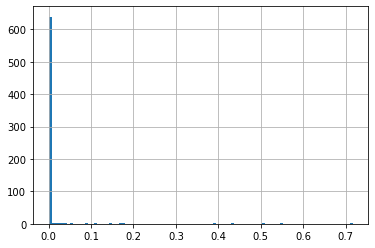

In [156]:
df[df.PIP > 0.9].P.hist(bins=100)

659

In [161]:
df[["CHR", "CREDIBLE_SET"]].drop_duplicates().shape

(247, 2)

In [162]:
df = pd.read_parquet("../../results/gwas/processed.parquet")
df

,chrom,pos,ref,alt,trait,method,pip,region,maf,LD_HWE,LD_SV
0,1,820055,T,G,IGF1,SUSIE,0.001039,chr1:708908-3708908,0.005550,False,False
1,1,832873,A,C,IGF1,SUSIE,0.003492,chr1:708908-3708908,0.236748,False,False
2,1,833068,G,A,CRP,SUSIE,0.004263,chr1:64194-3064194,0.106004,False,False
3,1,834583,G,A,CRP,SUSIE,0.004209,chr1:64194-3064194,0.105298,False,False
4,1,835506,G,A,CRP,SUSIE,0.004478,chr1:64194-3064194,0.104339,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4760856,22,50783624,G,A,Mono,SUSIE,0.001769,chr22:48513402-51304566,0.300835,False,False
4760857,22,50784537,G,A,Mono,SUSIE,0.001520,chr22:48513402-51304566,0.304649,False,False
4760858,22,50790482,G,A,Mono,SUSIE,0.003555,chr22:48513402-51304566,0.299990,False,False
4760859,22,50791289,A,T,Mono,SUSIE,0.003565,chr22:48513402-51304566,0.296184,False,False
